# MathAData - Module Statistiques - 1

## Classification des images de 2 et de 7

!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.  
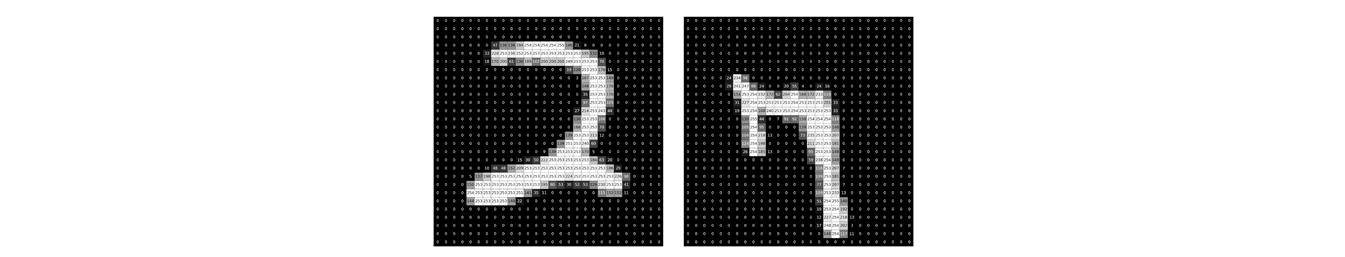  
!!!

!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">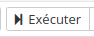</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!
!!! warning  SOS <details><summary>  
   Rien ne se passe ? Clique ici  </summary>   
Possibilité 1 : Ci-dessous tu vois :<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">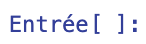</span> : Clique bien dans la cellule ci-dessous puis exécute.   
Possibilité 2 :  Tu vois bien ceci <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span> (le numéro entre crochet peut être autre) mais la suite ne s'affiche pas ?   
Cliquez sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">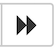</span>sur la barre d'outils en haut du notebook.  
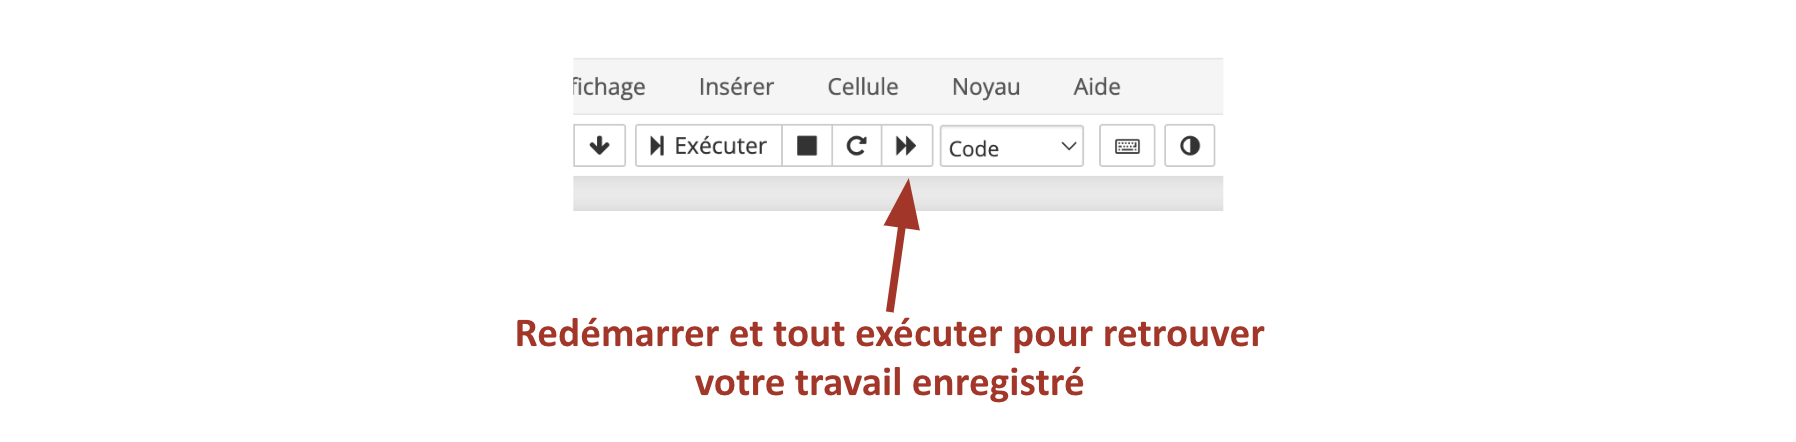.</details>  
!!!

In [ ]:
from utilitaires_mnist import *
from utilitaires_S_STATS_moyenne_histogramme import *

!!! tip Base de donnée  
Nous avons environ 6 000 images.  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher {data('le')} correspondant{e_fem()} et vous déplacer avec les flèches haut et bas du clavier.  
!!!

In [ ]:
affichage_banque()

validation_execution()

!!! question Combien d'images de 7 y a-t-il parmi les 10 premières images ?  
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
nombre_7 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_nombre()

!!! question Combien d'images contient la base de données au total ?   
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
nombre_total_images = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_nombre_total()

## Point de départ

!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
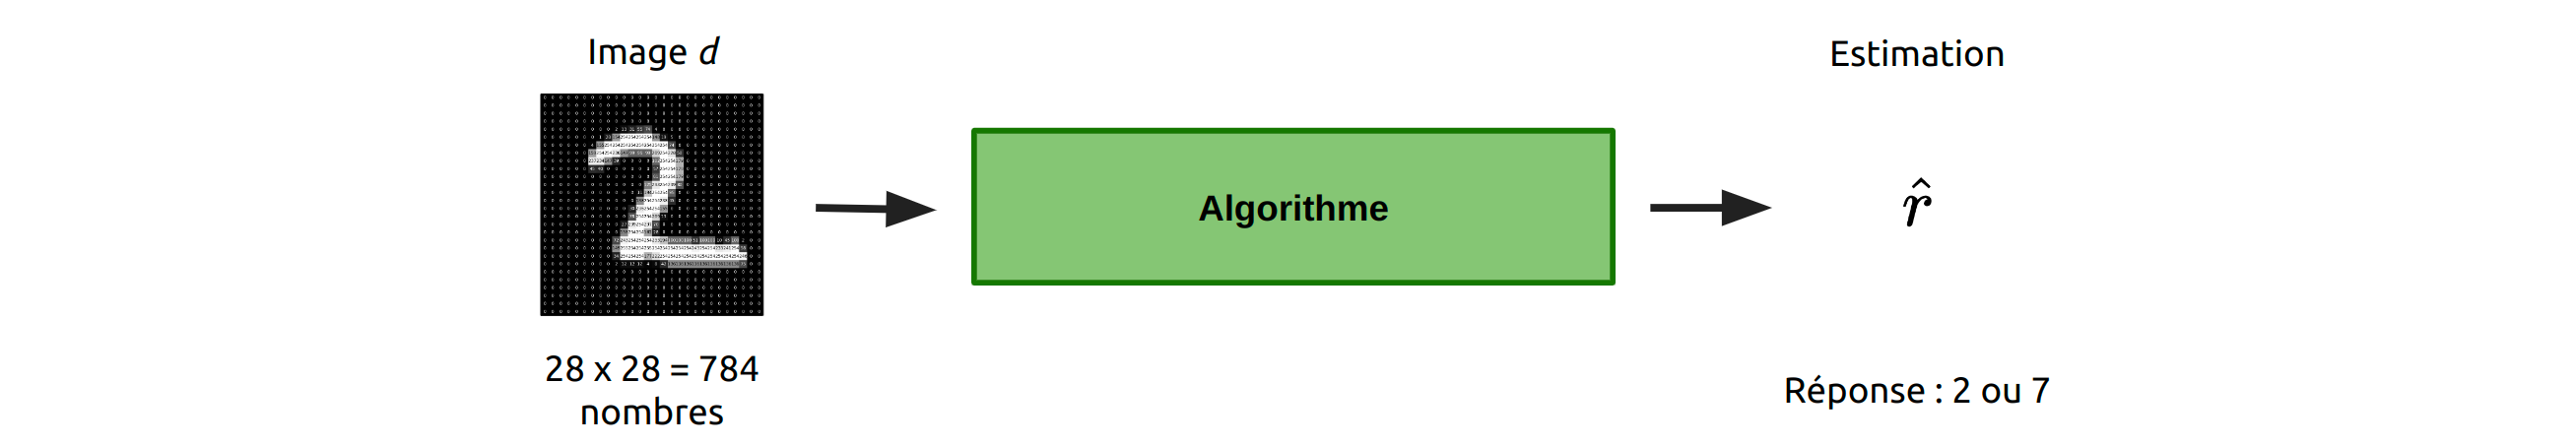  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours 2**.  
!!!

In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! question Que répond l'algorithme fainéant pour ces trois images ?  
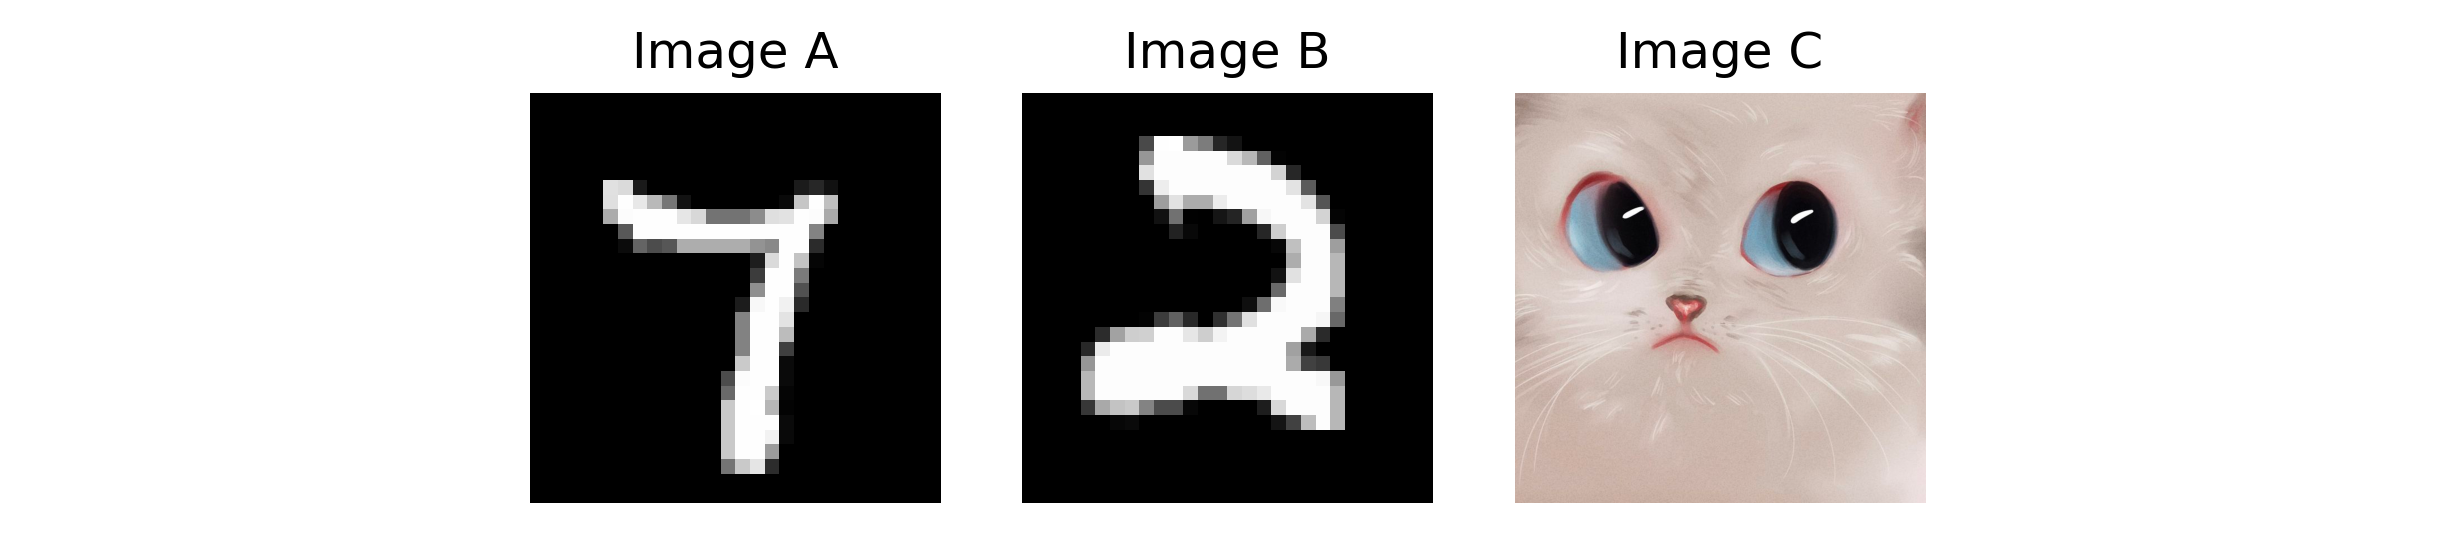  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!

In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Plus le pourcentage d'erreur de votre algorithme est bas meilleur est votre solution.  
  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}} \times 100.$$  
Une image mal classée est une image pour laquelle l'algorithme a donné une prédiction différente de la vraie classe de l'image:  
$$\hat r \neq r.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?  
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 000 images.  
!!!

In [ ]:
calculer_score_etape_1()

## Image numérique

!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
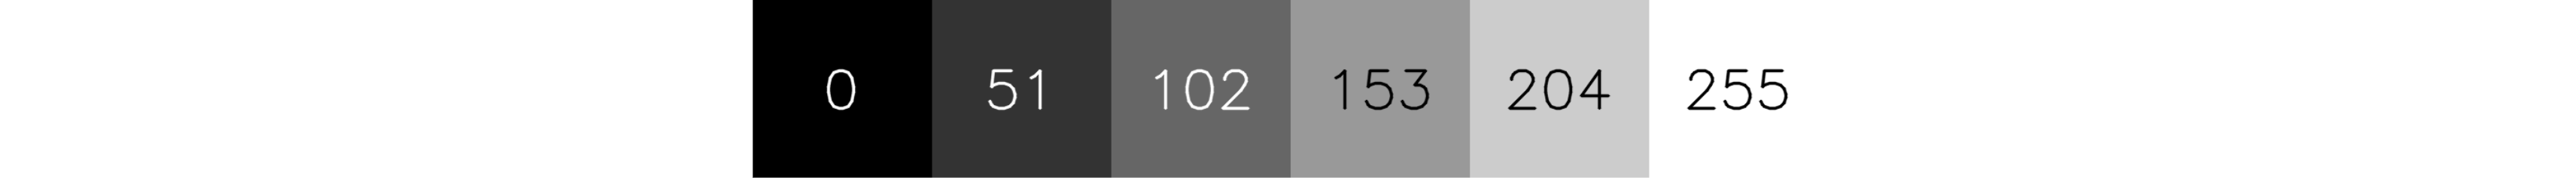  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!

In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question Quelle est la valeur du pixel positionné en ligne 18 et colonne 15 ?  
Lisez dans le tableau la valeur du pixel et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
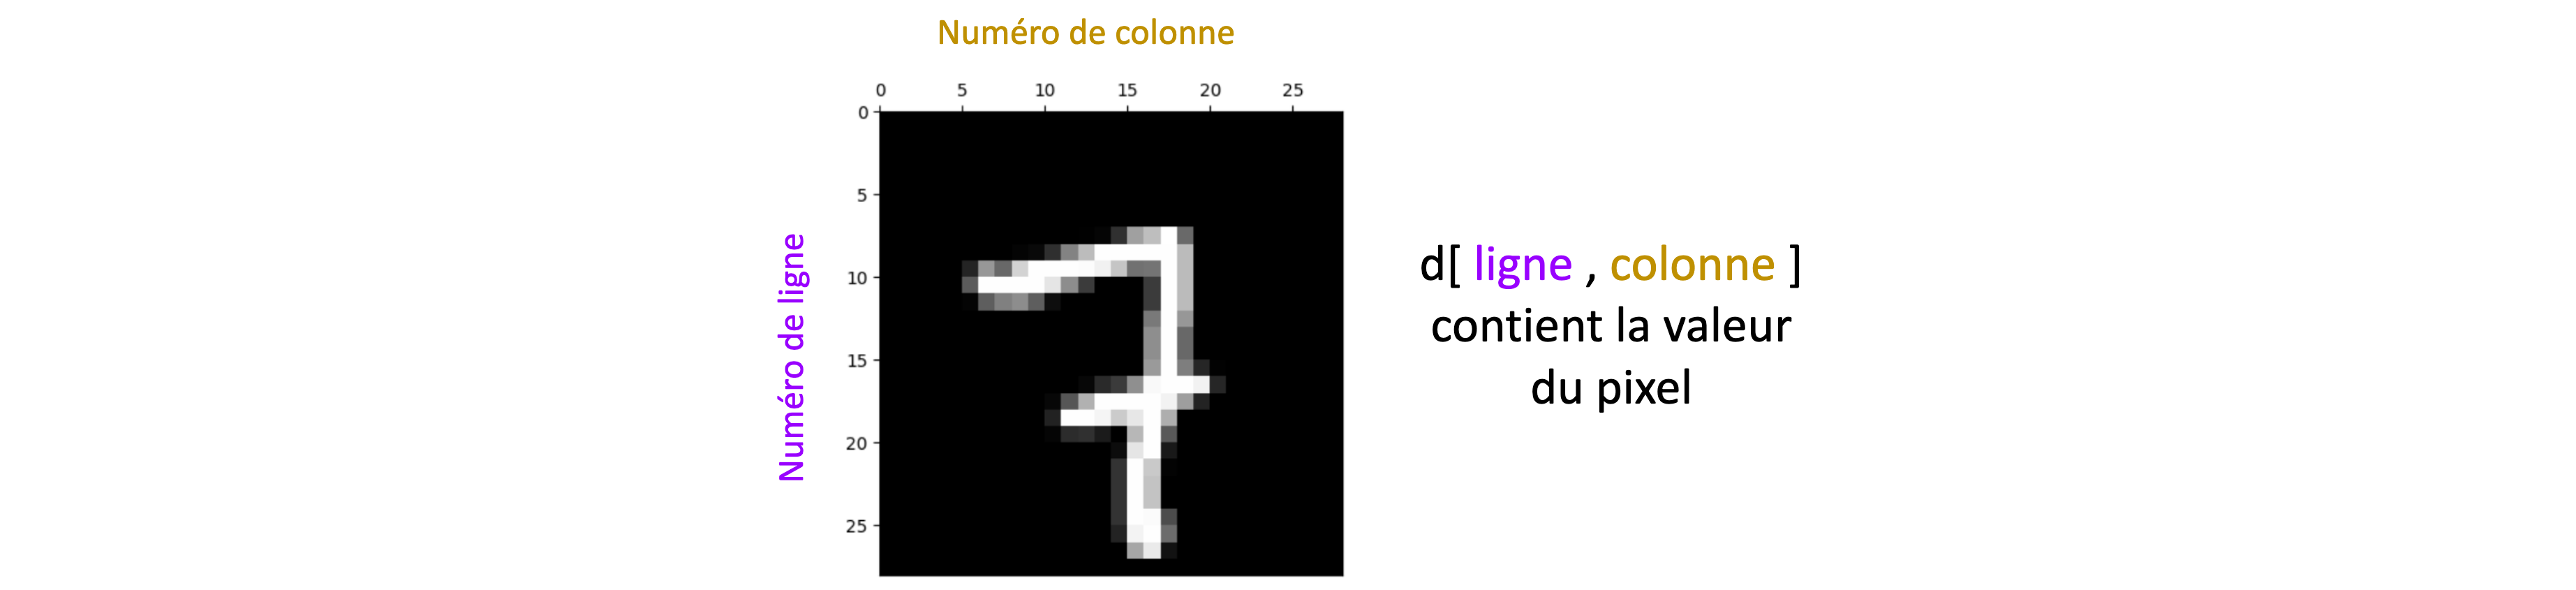  
Remarque : Dans le cas des tableaux python la première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne).  
!!!

In [ ]:
pixel = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_pixel()

!!! question Transformez le pixel (17,15) en pixel noir  
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!

In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## Calcul d'une caractéristique

!!! info Caractéristique d'une image  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
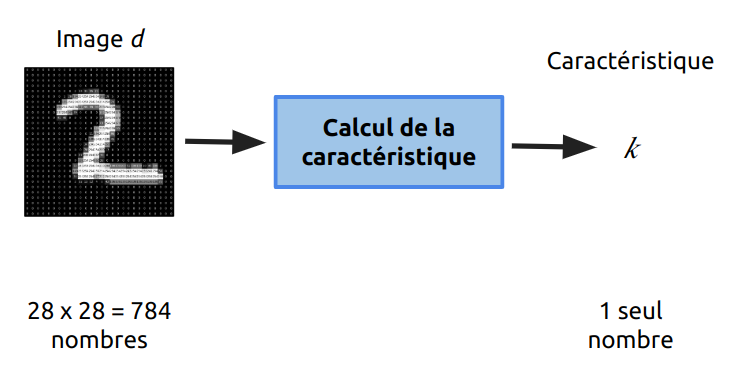  
La caractéristique notée $x$ permet de résumer l'image en une seule information.  
!!!

!!! tip La moyenne  
Pour résumer les valeurs de certains pixels en une seule valeur, on fait la moyenne de ces pixels.  
!!!

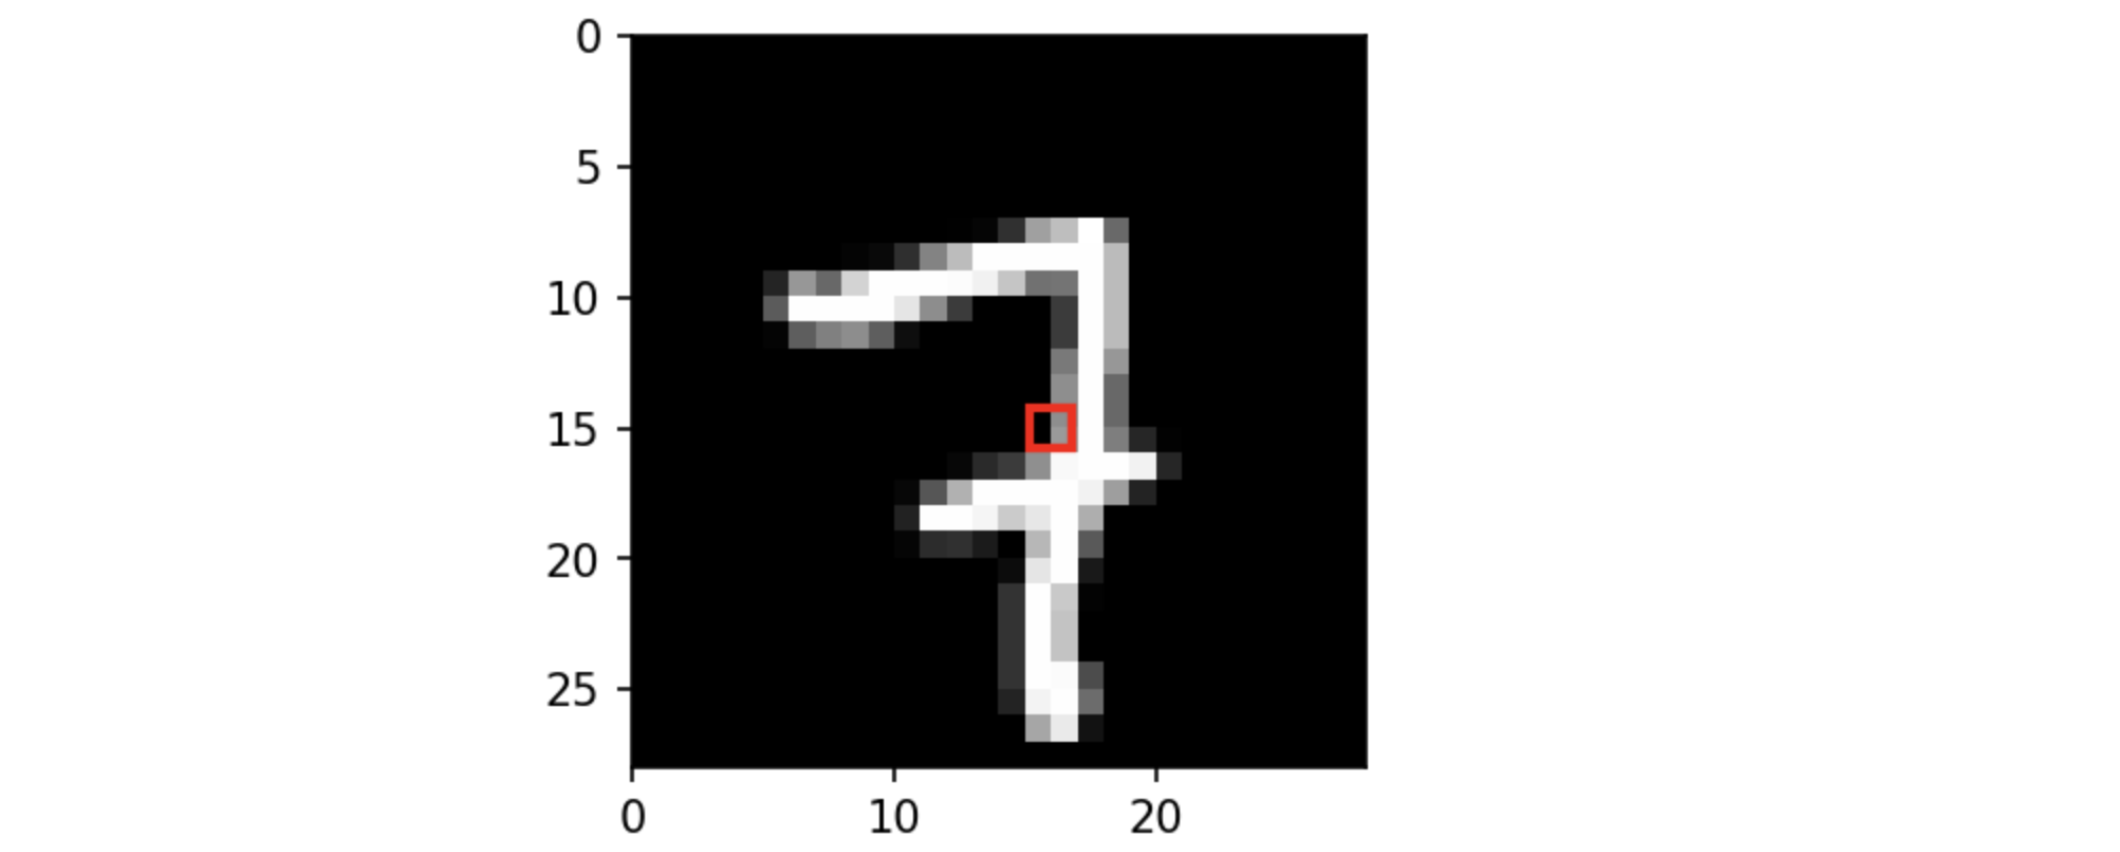  
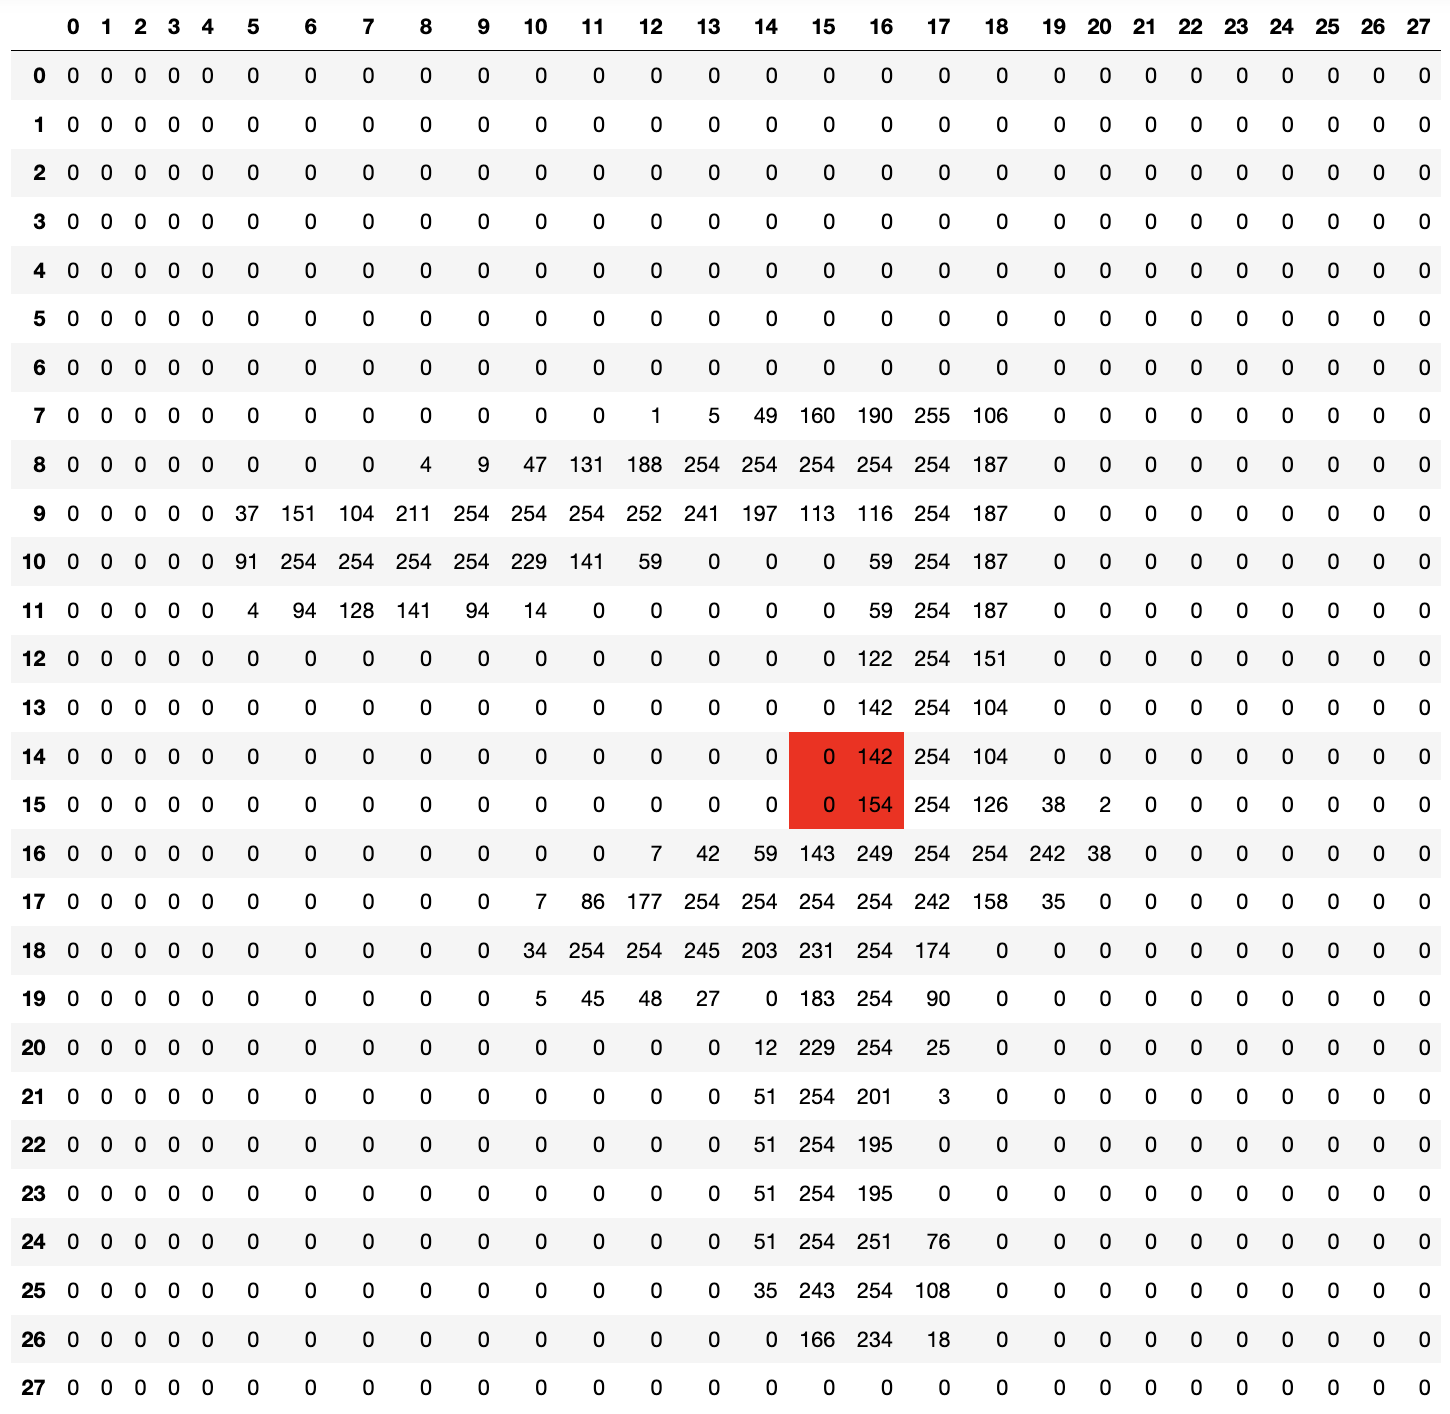
!!! question Calculez la moyenne sur les pixels rouges  
Calculez la moyenne des pixels de la zone surlignée en rouge. Donnez votre réponse **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
!!!

In [ ]:
moyenne_zone_4pixels = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_moyenne()

!!! tip Caractéristique : moyenne de l'image entière  
Nous allons prendre comme caractéristique la moyenne de l'image c'est à dire la moyenne des valeurs de **tous** ses pixels.  
!!!

## Classificateur

!!! info Classification  
La classification est la dernière étape de l'algorithme. On répond 2 ou 7 en fonction de la caractéristique $x$.  
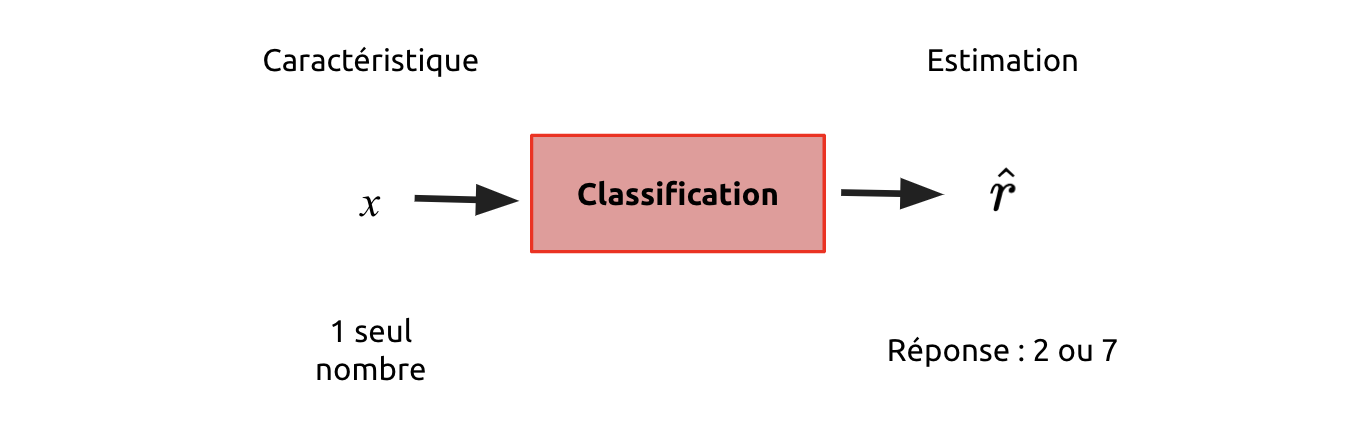  
**On compare $x$ à un seuil $t$** à définir : $\hat{r} = \left\{ \begin{array}{ll} 2 & \mbox{si $x \leq t$} \\ 7 & \mbox{si $x > t$} \end{array} \right.$ ou l'inverse : $\hat{r} = \left\{ \begin{array}{ll} 7 & \mbox{si $x \leq t$} \\ 2 & \mbox{si $x > t$} \end{array} \right.$  
!!!

In [ ]:
affichage_banque(carac=1)
exercice_droite_carac()

validation_execution_affichage_classif()

!!! question Placer les 10 premières images sur une droite  
Cliquez sur la droite pour placer les images avec leur caractéristique en abscisse. Vous pourrez éxécuter la cellule suivante quand vous aurez placé correctement les 10 premières images (dans l'ordre).  
!!!

In [ ]:
validation_exercice_droite_carac()

!!! question La caractéristique est-elle plus élevée pour les 2 ou pour les 7 ?  
Regardez les points sur la droite et indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
!!!

In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_ordre_caracteristique()

!!! question Choisissez un seuil $t$.  
Regardez à nouveau la droite et choisissez une valeur dite  **seuil** $t$ pour séparer les 2 et les 7  
!!!

In [ ]:
# Remplacez les ... avec la valeur que vous avez choisi
t = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_seuil()

!!! tip Fonction finale  
À partir de vos deux réponses précédentes, on peut coder la fonction `classification` :  
!!!

In [ ]:
# Fonction répondant au problème en fonction de la caractéristique x de la donnée que l'on doit classer
def classification(x, t):
    # Comparaison de la caractéristique au seuil t
    if x <= t:
        return r_petite_caracteristique
    else:
        return r_grande_caracteristique
    
validation_execution_classif()

!!! abstract Notre algorithme est complet !  
En mettant bout à bout les étapes précédentes, nous pouvons construire un algorithme complet :  
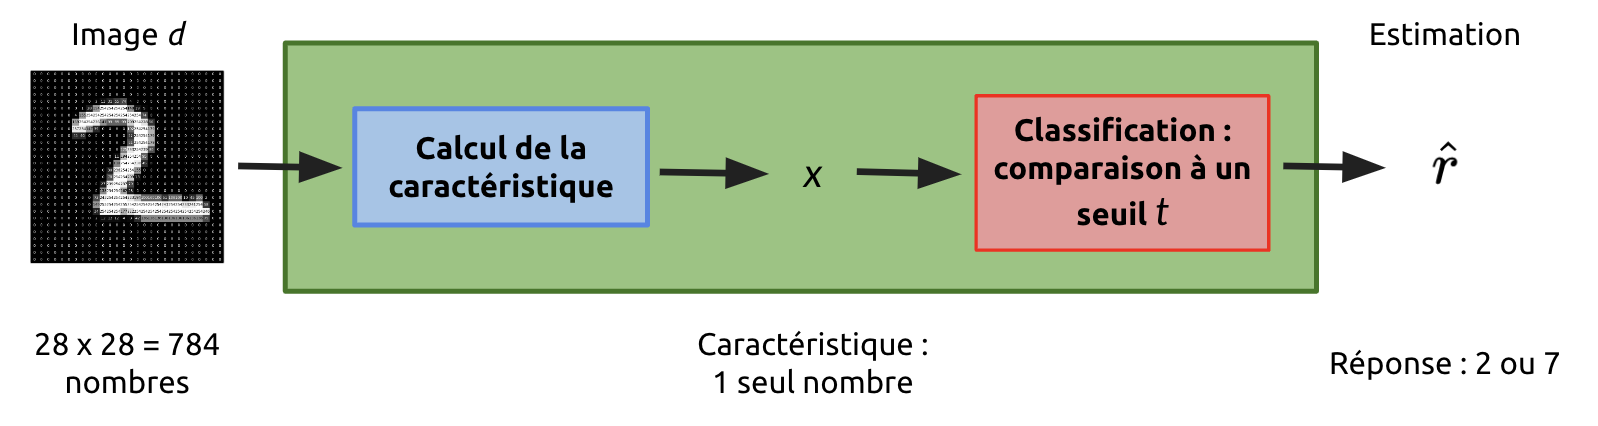  
Pour prédir si une image est un 2 ou un 7, l'algorithme calcule la moyenne des pixels de l'image et compare cette moyenne à un seuil $t$.  
Si la moyenne est inférieure à $t$, l'algorithme prédit {classes[0]}, sinon il prédit {classes[1]}.  
!!!

## Calcul de l'erreur d'entraînement pour ce paramètre

!!! tip Exécutez la cellule suivante  
Exécutez la cellule suivante pour réafficher les valeurs de la caractéristique pour les images de la base d'entraînement.  
!!!

In [ ]:
affichage_banque(carac=1)

validation_execution_affichage_score()

!!! question Quel est votre pourcentage d'erreur sur les 10 premières images ?  
Avec le seuil que tu as choisi, combien d'erreurs l'algorithme a-t-il fait sur les 10 premières images ? (voir tableau ci-dessus). En déduire le pourcentage d'erreur à compléter dans la cellule suivante.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_seuil()

!!! tip Calculez votre erreur sur tout l'ensemble d'entraînement  
Exécutez la cellule suivante pour calculer votre pourcentage d'erreur avec la caractéristique et le seuil que vous avez choisi  
!!!

In [ ]:
calculer_score_carac()

!!! abstract Améliorations  
Nous allons voir dans les prochaines étapes les différentes possibilités pour diminuer votre pourcentage d'erreur.  
!!!

## Analyse statistique pour optimiser le seuil $t$

!!! info Histogramme et répartition des valeurs de la caractéristique  
Pour trouver le meilleur seuil $t$, on peut analyser les valeurs de la caractéristique $x$ pour les 2 et les 7.  
**Exécutez la cellule suivante** pour visualiser la construction de cet histogramme.  
!!!

In [ ]:
animation_histogramme()

validation_execution_animation_histogramme()

!!! tip Histogramme complet  
**Exécutez la cellule suivante** pour afficher l'histogramme complet en grand.  
L'histogramme indique le nombre d'images par classe pour chaque valeur de la caractéristique.  
!!!

In [ ]:
afficher_histogramme()

validation_execution_afficher_histogramme()

!!! question Quel histogramme correspond à quelle classe ?  
Regardez les deux histogrammes et indiquez dans la cellule suivante lequel correspond aux 2 et lequel correspond aux 7.  
!!!

In [ ]:
r_histogramme_orange = ...
r_histogramme_bleu = ...

validation_question_hist_1()

!!! question Lecture des histogrammes  
Combien y-a-t-il d'images de 2 qui ont une caractéristique entre 20 et 22 ?  
Et pour les images de 7 ?  
!!!

In [ ]:
# Remplacez les ... par la valeur de votre réponse

nombre_2 = ...

nombre_7 = ...

validation_question_hist_2()

!!! question Histogrammes et erreur  
Combien y-a-t-il d'images de 2 dont la caractéristique est inférieure strictement à 16 ?  
Et pour les images de 7 ?  
!!!

In [ ]:
# Remplacez les ... par la valeur de votre réponse

nombre_2_inf_16 = ...

nombre_7_inf_16 = ...

validation_question_hist_3()

!!! abstract Choix du seuil avec les histogrammes  
Grâce à l'histogramme, on peut choisir un seuil $t$ qui sépare les valeurs de $x$ des 2 et des 7.  
**Exécutez la cellule suivante** pour réafficher l'histogramme.  
!!!

In [ ]:
afficher_histogramme(legend=True)

!!! question Choisissez un seuil $t$.  
Regardez l'histogramme et choisissez le meilleur seuil $t$ pour classer les 2 et les 7.  
Remplacer les `...` dans la cellule suivante avec votre réponse.  
!!!

In [ ]:
t = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_hist_seuil()

!!! tip Calculez votre nouvelle erreur  
**Exécutez la cellule ci-dessous** pour calculer votre nouveau taux d'erreur, cette fois avec la valeur de $t$ optimale  
!!!

In [ ]:
calculer_score_hist_seuil()

## Amélioration de la caractéristique : faites mieux !


!!! abstract Comment faire mieux ?  
En optimisant le seuil, vous avez pu obtenir l'erreur la plus basse possible **en utilisant comme caractéristique la moyenne de tous les pixels de l'image.**  
Le seul moyen pour réduire encore le taux d'erreur est maintenant de trouver une meilleure caractéristique !  
!!!

##  Moyenne sur une partie de l'image



!!! info Utiliser la moyenne plus intelligemment  
Une première piste pour améliorer votre caractéristique : utiliser la moyenne seulement sur une zone de l'image qui vous parait intéressante pour distinguer les 2 et les 7.  
!!!

!!! question Choisissez la zone de l'image sur laquelle vous allez calculer la moyenne  
**Exécutez la cellule suivante** puis sélectionnez avec la souris un rectangle sur une des images. La caractéristique sera la moyenne des pixels dans ce rectangle.  
!!!  
!!! info Conseil  
N'oubliez pas que la caractéristique doit être la plus différente possible selon que l'image soit un 2 ou 7. Regardez les images pour trouver une zone qui diffère le plus entre les deux chiffres.  
!!!

In [ ]:
afficher_customisation()

validation_execution_afficher_customisation()

!!! question Choisissez les paramètres de classification  
1. À partir des histogrammes, indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
2. À partir des histogrammes, choisissez un seuil $t$ pour séparer les 2 et les 7. Essayez d'obtenir l'erreur la plus basse possible !  
!!!

In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

t = ...

# NE PAS TOUCHER CETTE LIGNE
calculer_score_custom()

## Quartier libre

!!! question Inventez votre propre caractéristique  
Complétez directement la fonction `caracteristique` dans la cellule suivante avec votre idée. La fonction doit renvoyer une seule valeur.  
!!!
!!! tip Exemple  
Cela peut être une bonne idée de continuer à utiliser les moyennes avec la fonction `moyenne_zone`. Vous pouvez en combiner plusieurs et les additionnant, multipliant, ajouter des coefficients...  
Nous avons prérempli la fonction pour donner un exemple.  
!!!

In [ ]:
def caracteristique(d):
    
    # Modifiez le calcul de la caracteristique x avec vos idées
    # Utilisez moyenne_zone(d, (..., ...), (..., ...)) et les opérations +,-,*
    
    a = 1
    b = -1

    x = a * moyenne_zone(d, (0,0), (14,27)) + b * moyenne_zone(d, (14,0), (27,27))
    return x



afficher_histogramme(caracteristique=caracteristique)

!!! question Choisissez les paramètres de classification  
1. À partir des histogrammes, indiquez dans la cellule suivante quelle classe (2 ou 7) a souvent une plus petite caractéristique que l'autre et inversement.  
2. À partir des histogrammes, choisissez un seuil $t$ pour séparer les 2 et les 7. Essayez d'obtenir l'erreur la plus basse possible !  
!!!

In [ ]:
r_petite_caracteristique = ...
r_grande_caracteristique = ...

t = ...

# NE PAS TOUCHER CETTE LIGNE
calculer_score_code_eleve()

!!! abstract Fin du Notebook  
Dans ce notebook, vous avez :  
  
- Fait des opérations numériques sur des images  
- Définit des caractéristiques pour passer de l'image à un seul nombre  
- Fait une classification par seuil pour utiliser cette caractéristique afin de répondre à la question  
- Optimisé le seuil $t$ pour minimiser votre erreur avec chaque caractéristique testée  
  
S'il vous reste du temps, vous pouvez continuer à tester des caractéristiques en répétant les étapes précédentes à partir de la définition de la fonction caractéristique  
!!!